# Train MNIST

In [2]:
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
from torch import optim, nn
import torch
import numpy as np
from sklearn.metrics import accuracy_score
from torchvision import transforms

from MNISTModel import Feedforward

In [31]:
model = Feedforward()

In [32]:
def eval_accuracy(model, val, y_val):
    output = model(val)
    y_hat = np.argmax(output.data, axis=1)
    return accuracy_score(y_val, y_hat)

In [4]:
mnist_dataset = torchvision.datasets.MNIST('./data', download=True, train=True, transform=transforms.ToTensor())
dataloader = DataLoader(mnist_dataset, batch_size=100)

In [34]:
mnist_dataset.data.shape

torch.Size([60000, 28, 28])

In [37]:
mnist_dataset_test = torchvision.datasets.MNIST('./data', train=False, transform=transforms.ToTensor())
dataloader_test = DataLoader(mnist_dataset_test, batch_size=1000)

In [38]:
optimizer = optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

num_epochs = 50
losses = []
accuracies = []
lrs = []
for epoch in range(num_epochs):
    loss_sum = 0
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data
        outputs = model(inputs.reshape(inputs.shape[0], -1))
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        loss_sum += loss.data

    print(f'\r epoch: [{epoch + 1}/{num_epochs}], loss: {loss_sum}', end='')
    losses.append(loss_sum)

 epoch: [50/50], loss: 27.087369918823242

In [85]:
def plot_confusion_matrix(pred, target):
    matrix = np.zeros((10, 10))
    for p, t in zip(pred, target):
        matrix[p][t] += 1

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.matshow(matrix)
    for (i, j), z in np.ndenumerate(matrix):
        ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
    plt.show()

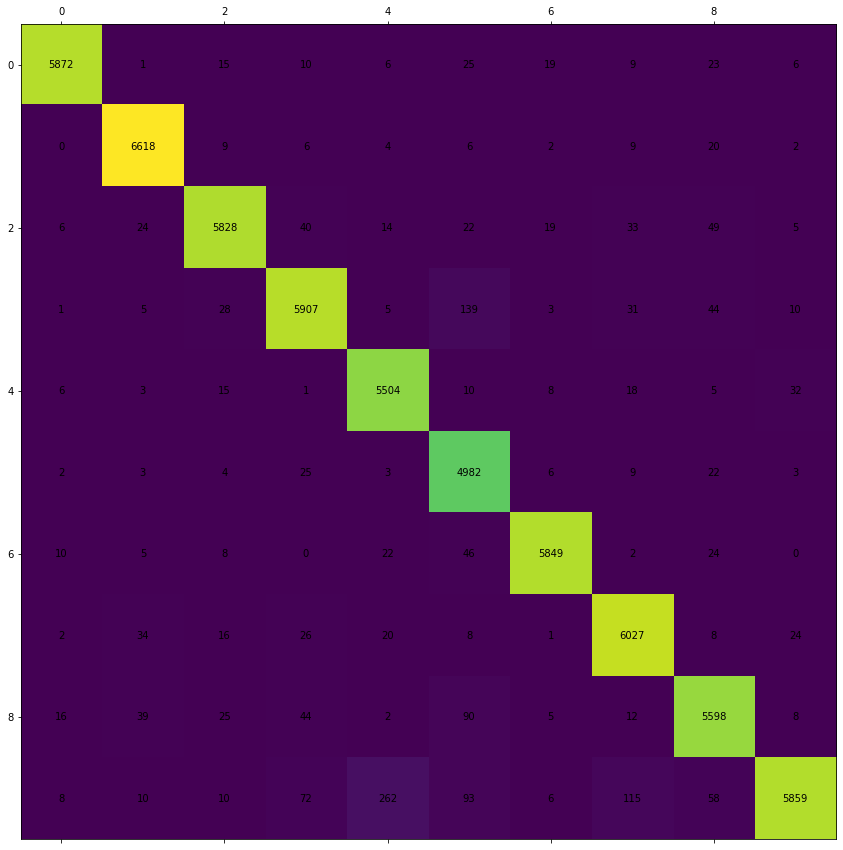

In [89]:
model.eval()
y_hat = model(mnist_dataset.data.reshape(mnist_dataset.data.shape[0], -1).float())
y_pred = np.argmax(y_hat.data, axis=1)

plot_confusion_matrix(y_pred, mnist_dataset.targets)

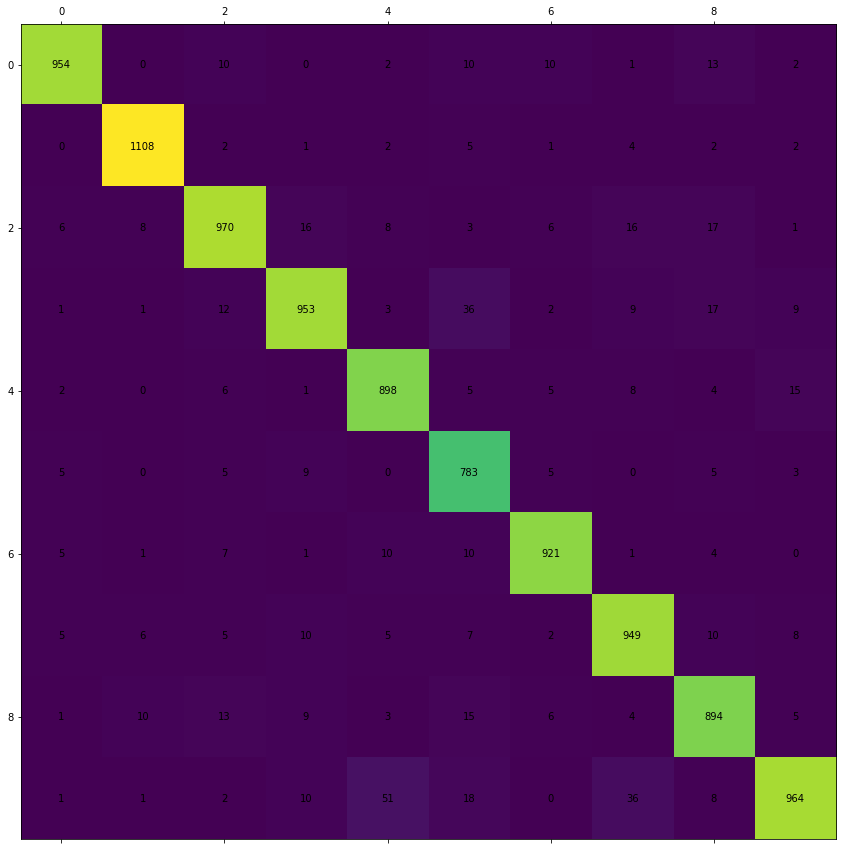

In [90]:
model.eval()
y_hat = model(mnist_dataset_test.data.reshape(mnist_dataset_test.data.shape[0], -1).float())
y_pred = np.argmax(y_hat.data, axis=1)

plot_confusion_matrix(y_pred, mnist_dataset_test.targets)

In [92]:
torch.save(model.state_dict(), "./models/mnist.pt")